I'm running the code again for `create_arpas` but with new data! Doing a new code base just to maintain old results to compare.

In [1]:
from article_process_new import ArticleLM

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd

In [3]:
# path_to_data = '/Users/stephanie/data/newsela_articles_corpus_2019-03-25_SMALL'
path_to_data = '/Users/stephanie/data/newsela_articles_corpus_2019-03-25'
path_to_kenlm = '/Users/stephanie/github/kenlm'
path_to_arpa = path_to_kenlm + '/lm'

In [4]:
articleLM = ArticleLM(path_to_data, path_to_kenlm, path_to_arpa, 5, 'grade_level')

In [5]:
len(articleLM.metadata_split[articleLM.metadata_split.train_val_test == 'train'])

19127

In [6]:
len(articleLM.metadata_split[articleLM.metadata_split.train_val_test == 'val'])

2391

In [7]:
19127 / (19127 + 2391*2)

0.7999916349491824

In [7]:
# articleLM.metadata_split

## Builds the processed sentences that I need for KenLM

In [7]:
articleLM.build_data()

In [8]:
articleLM.train_all_arpas()

Processing 3
Grade 3 has 126587 sentences in the train set.
=== 1/5 Counting and sorting n-grams ===
File stdin isn't normal.  Using slower read() instead of mmap().  No progress bar.
Unigram tokens 1270479 types 28185
=== 2/5 Calculating and sorting adjusted counts ===
Chain sizes: 1:338220 2:1340834816 3:2514065408 4:4022504448 5:5866152960
Statistics:
1 28185 D1=0.565424 D2=1.06633 D3+=1.60649
2 316966 D1=0.734396 D2=1.10418 D3+=1.42523
3 718255 D1=0.846408 D2=1.20247 D3+=1.44917
4 921856 D1=0.917351 D2=1.30915 D3+=1.47758
5 938646 D1=0.946017 D2=1.38184 D3+=1.55353
Memory estimate for binary LM:
type    MB
probing 61 assuming -p 1.5
probing 72 assuming -r models -p 1.5
trie    28 without quantization
trie    15 assuming -q 8 -b 8 quantization 
trie    25 assuming -a 22 array pointer compression
trie    12 assuming -a 22 -q 8 -b 8 array pointer compression and quantization
=== 3/5 Calculating and sorting initial probabilities ===
Chain sizes: 1:338220 2:5071456 3:14365100 4:22124544

=== 1/5 Counting and sorting n-grams ===
Reading stdin
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95--100
File stdin isn't normal.  Using slower read() instead of mmap().  No progress bar.
****************************************************************************************************
Unigram tokens 363736 types 13601
=== 2/5 Calculating and sorting adjusted counts ===
Chain sizes: 1:163212 2:1340851840 3:2514097408 4:4022555392 5:5866227200
Statistics:
1 13601 D1=0.550425 D2=1.18607 D3+=1.54308
2 116374 D1=0.743945 D2=1.13617 D3+=1.426
3 226322 D1=0.856746 D2=1.23842 D3+=1.40708
4 269656 D1=0.923843 D2=1.33149 D3+=1.51248
5 261102 D1=0.951744 D2=1.45172 D3+=1.47783
Memory estimate for binary LM:
type       kB
probing 19287 assuming -p 1.5
probing 22928 assuming -r models -p 1.5
trie     8882 without quantization
trie     4642 assuming -q 8 -b 8 quantization 
trie     8048 assuming -a 22 array pointer compression
trie     3809 assum

## Printing out stats

how many sentences there are in training set, indexed by grade level?

In [9]:
for g in articleLM.level_sentences.get('train').keys():
    print(g, len(articleLM.level_sentences.get('train').get(g)))

3 126587
6 83922
7 123845
8 67452
5 176603
4 124205
9 74074
2 43196


In [10]:
# Number of sentences, train
sentence_len = 0
for g in articleLM.level_sentences.get('train').keys():
    sentence_len+=len(articleLM.level_sentences.get('train').get(g))
    
print(sentence_len)

819884


In [11]:
# Number of sentences, validation
sentence_len = 0
for g in articleLM.level_sentences.get('val').keys():
    sentence_len+=len(articleLM.level_sentences.get('val').get(g))
print(sentence_len)

102903


how many articles there are in each set, indexed by grade level?

In [12]:
articleLM.metadata_split[articleLM.metadata_split.train_val_test=='train'].grade_level.value_counts()

5    3910
3    3286
7    2883
4    2560
9    2028
6    1839
8    1592
2    1029
Name: grade_level, dtype: int64

In [13]:
articleLM.metadata_split[articleLM.metadata_split.train_val_test=='train'].grade_level.value_counts().sum()

19127

In [14]:
articleLM.metadata_split[articleLM.metadata_split.train_val_test=='val'].grade_level.value_counts()

5    507
3    427
7    346
4    300
6    244
9    235
8    188
2    144
Name: grade_level, dtype: int64

## Comparing perplexities

In [15]:
sentence_guesses = articleLM.compute_all_sentences_best_guess([2, 3, 4, 5, 6, 7, 8, 9])

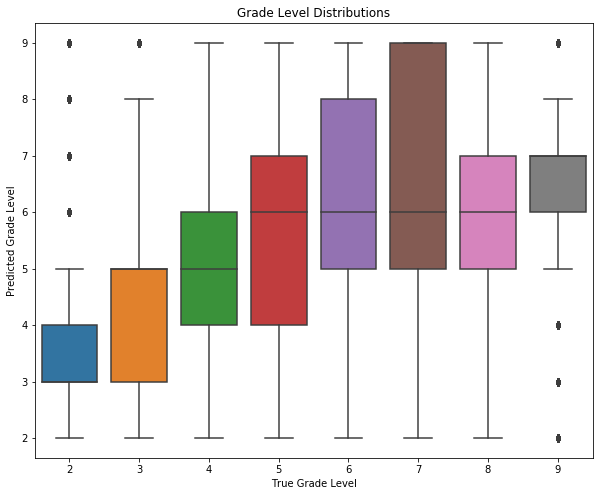

In [16]:
sentence_guesses = articleLM.plot_sentence_distribution([2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(sentence_guesses.level, sentence_guesses.best_guess)

In [18]:
cm

array([[1019, 2690, 1606,  631,  258,  105,   67,   47],
       [2121, 2225, 3044, 5992,  790, 1453,  335,  470],
       [1016, 2420,  803, 5618, 2258, 1387,  793,  373],
       [ 615, 3631, 4771, 1203, 3407, 5620, 1335, 1800],
       [ 198,  559, 1862, 2584,  180, 2118, 2791,  392],
       [ 193,  648, 1108, 3967, 1801,  650, 1555, 5481],
       [ 106,  179,  719, 1190, 2695, 2277,  251,  436],
       [  80,  219,  344, 1427,  542, 5551,  412,  485]])

In [19]:
accuracy_score(sentence_guesses.level, sentence_guesses.best_guess)

0.0662371359435585

In [20]:
len(sentence_guesses[sentence_guesses.level == sentence_guesses.best_guess]) / len(sentence_guesses)

0.0662371359435585

## Article level

In [21]:
means = articleLM.compute_article_best_grade_levels()

iteration 10, article ('gerrymandering-redistricting', 3)
iteration 20, article ('hawaii-philosophical', 3)
iteration 30, article ('nobel-literature', 5)
iteration 40, article ('mexico-earthquake', 5)
iteration 50, article ('parents-let-teens-ride-uber', 4)
iteration 60, article ('mummy-scans', 3)
iteration 70, article ('tortoise-shells', 7)
iteration 80, article ('teen-nasajob', 2)
iteration 90, article ('tsunami-pod', 3)
iteration 100, article ('netflix-fortnite', 5)
iteration 110, article ('preslibrary-land', 4)
iteration 120, article ('nutria-laststand', 8)
iteration 130, article ('pokemon-augmented-reality', 7)
iteration 140, article ('opinion-how-transform-education-system', 3)
iteration 150, article ('payphone-wifi', 7)
iteration 160, article ('wildfires-tennessee-warning', 5)
iteration 170, article ('Obama-Islamic-State', 4)
iteration 180, article ('perry-presannounce', 5)
iteration 190, article ('wars-procon', 5)
iteration 200, article ('bbking-obit', 9)
iteration 210, article

iteration 1610, article ('elem-crawfish-invasion-berlin', 5)
iteration 1620, article ('pie-tops-pizza-sneakers', 7)
iteration 1630, article ('discrimination-native-americans', 9)
iteration 1640, article ('elem-part-time-hermit', 4)
iteration 1650, article ('google-selfcars', 4)
iteration 1660, article ('testscores-mathreading', 6)
iteration 1670, article ('elem-night-animals-zoo-exhibit', 4)
iteration 1680, article ('nasa-job-save-earth-from-aliens', 7)
iteration 1690, article ('elem-donated-sports-gear', 2)
iteration 1700, article ('flyers-mascot-gritty', 7)
iteration 1710, article ('brothers-keeper', 9)
iteration 1720, article ('elem-selfie-penguins', 2)
iteration 1730, article ('illnesses-carried-by-bugs-increasing', 9)
iteration 1740, article ('elem-macaw-birds-blush', 4)
iteration 1750, article ('elem-school-drumline', 3)
iteration 1760, article ('paddington-bear-sixty', 5)
iteration 1770, article ('youth-smoking-increase-vaping', 3)
iteration 1780, article ('elem-siberia-coldest-

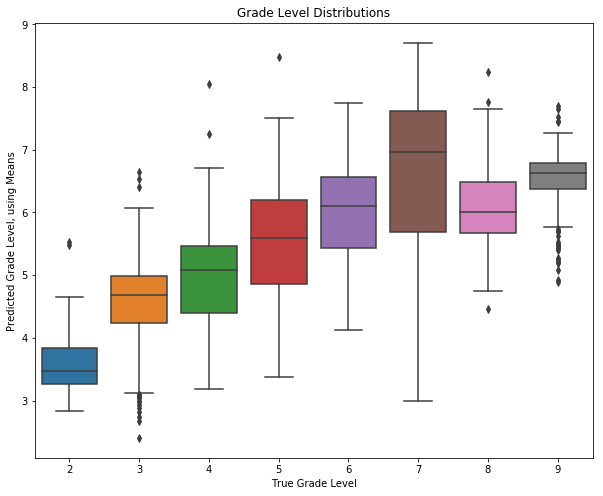

In [22]:
articleLM.plot_article_best_grade_levels(means)

In [23]:
means.head()

,article,true_gl,predicted_gl
0,10dollarbill-woman,5,6.150943
1,10dollarbill-woman,6,7.346154
2,13-year-old-soccer-player-pro,3,5.382979
3,13yo-college-acceptance,8,5.423077
4,2016-trump-win,5,6.348485


In [24]:
means.loc[:,'predicted_gl'] = means.predicted_gl.astype('int')

In [25]:
means.loc[:,'true_easy'] = [1 if x <= 5 else 0 for x in means.true_gl]
means.loc[:,'predicted_easy'] = [1 if x <= 5 else 0 for x in means.predicted_gl]

In [26]:
from sklearn.metrics import confusion_matrix, f1_score

cm = confusion_matrix(means.true_easy, means.predicted_easy)

In [27]:
len(means[means.true_easy == means.predicted_easy] ) * 100/ len(means)

77.51147373788883

In [31]:
accuracy_score(means.true_easy, means.predicted_easy)

0.7751147373788884

In [28]:
cm = confusion_matrix(means.true_gl, means.predicted_gl)

In [29]:
cm

array([[  1, 105,  17,   2,   0,   0,   0,   0],
       [  7,  46, 195,  77,   6,   0,   0,   0],
       [  0,  23,  96, 114,  28,   1,   1,   0],
       [  0,  31,  81, 159, 123,  13,   1,   0],
       [  0,   0,  34,  43,  97,  23,   0,   0],
       [  0,   1,  16,  72,  57, 110,  32,   0],
       [  0,   0,   5,  70,  72,   6,   1,   0],
       [  0,   0,   2,  25, 147,  21,   0,   0]])

In [32]:
accuracy_score(means.true_gl, means.predicted_gl)

0.26007139214686387

In [30]:
f1_score(means.true_easy, means.predicted_easy, pos_label=1)

0.8122605363984675

In [ ]:
article_df.groupby(['article', 'true_gl']).mean()

In [ ]:
article_df.groupby(['article', 'true_gl']).agg({np.mean: 'min_perplexity'})

/Users/stephanie/miniconda3/envs/autograder/lib/python3.7/site-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [ ]:
    def compute_perplexity_validation(self, split_type, grade_level):
        """
        Each row is a different sentence
        :param split_type:
        :param grade_level:
        :return:
        """
        # Split type can be 'val' or 'test'
        sample_perp = dict()
        for ix, sentence in enumerate(self.grade_level_sentences[split_type][grade_level]):
            perplexities = self.compute_sentence_perplexities(sentence)
            sample_perp[ix] = perplexities
        sample_perp_df = pd.DataFrame(sample_perp).T
        sample_perp_df.columns = sorted(self.models.keys())

        sample_perp_df.loc[:, 'min_perplexity'] = sample_perp_df.idxmin(axis=1, skipna=True)
        sample_perp_df.loc[:, 'max_perplexity'] = sample_perp_df.idxmax(axis=1, skipna=True)
        return sample_perp_df

# Comparing perplexities

In [14]:
GL = dict()
grade_levels_considered = [2, 3, 4, 5, 6, 7, 8, 9]

In [15]:
for gl in sorted(articleLM.grade_level_sentences['val'].keys()):
    GL[gl] = articleLM.compute_perplexity_validation('val', gl)

In [22]:
perplex_best_guess = []
perplex_gl = []

for gl in sorted(articleLM.grade_level_sentences['val'].keys()):
    perplex_best_guess.extend(GL[gl].min_perplexity)
    perplex_gl.extend(np.ones_like(GL[gl].min_perplexity) * gl)
    
perplex_guesses = pd.DataFrame({'grade_level':perplex_gl, 'best_guess': perplex_best_guess})

Text(0, 0.5, 'Predicted Grade Level')

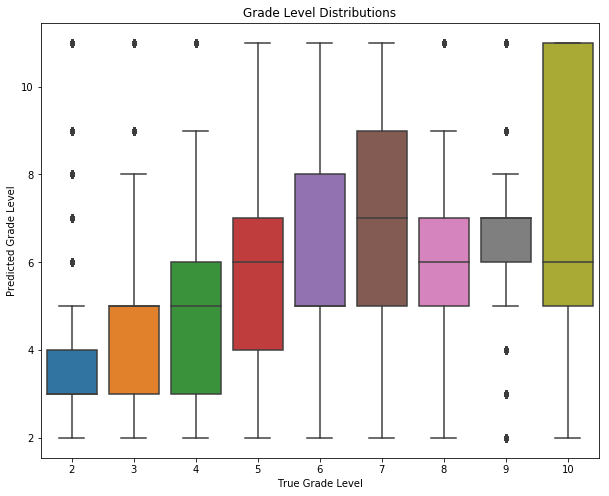

In [23]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
ax.set_title("Grade Level Distributions")
# ax.set_xlabel("True Grade Level")
# ax.set_ylabel("Predicted Grade Level")
sns.boxplot(ax=ax, x="grade_level", y="best_guess", data=perplex_guesses)
ax.set_xlabel("True Grade Level")
ax.set_ylabel("Predicted Grade Level")

## Confusion matrix

In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(perplex_guesses.grade_level, perplex_guesses.best_guess)

In [32]:
cm

array([[ 2272,  5933,  3590,  1370,   539,   278,   184,   110,     0,
          595],
       [ 5376,  6387,  9028, 14553,  2824,  3192,  1051,  1532,     0,
         1633],
       [ 2547,  6778,  1682, 12139,  4968,  2223,  1633,   698,     0,
         1154],
       [ 1451,  9404, 11330,  3176,  8200, 11894,  3080,  4394,     0,
         2015],
       [  285,  1699,  3956,  7481,   667,  4268,  5616,  1391,     0,
         1348],
       [  211,  1433,  2209,  9357,  4325,  1333,  3178, 11450,     0,
         2029],
       [  115,   526,  1507,  2885,  5478,  3390,   580,  1020,     0,
         1386],
       [   67,   572,   437,  3222,   932, 10692,   673,   947,     0,
         1545],
       [    1,     1,     0,    24,     2,     3,     3,     2,     0,
           17],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0]])

In [26]:
np.linalg.norm(perplex_guesses.grade_level - perplex_guesses.best_guess, ord=2)

1199.8395726096053

In [27]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(np.array(perplex_guesses.grade_level).reshape(-1, 1), 
                            np.array(perplex_guesses.best_guess))

In [28]:
lm.coef_

array([0.4272429])

In [29]:
lm.intercept_

3.458240040421758

In [30]:
lm.score(np.array(perplex_guesses.grade_level).reshape(-1, 1), 
                            np.array(perplex_guesses.best_guess))

0.14144455074056295

In [31]:
len(perplex_guesses[perplex_guesses.grade_level == perplex_guesses.best_guess] ) * 100/ len(perplex_guesses)

6.887132489615155

In [ ]:
# perplex_guesses.loc[:,'school_type_actual'] = list(1 if x >= 5 else 0 for x in perplex_guesses.grade_level)
# perplex_guesses.loc[:,'school_type_est'] = list(1 if x >= 5 else 0 for x in perplex_guesses.best_guess)

In [33]:
perplex_guesses.loc[:,'high_actual'] = list(1 if x >= 5 else 0 for x in perplex_guesses.grade_level)
perplex_guesses.loc[:,'high_est'] = list(1 if x >= 5 else 0 for x in perplex_guesses.best_guess)

In [34]:
confusion_matrix(perplex_guesses.high_actual, perplex_guesses.high_est)

array([[ 43593,  50676],
       [ 35204, 118003]])

In [35]:
len(perplex_guesses[perplex_guesses.high_actual == perplex_guesses.high_est] ) * 100/ len(perplex_guesses)

65.29764502416396